# Data Preprocessing
Breast cancer data used. What's most important is that **if train data was preprocessed for model fitting, test data should be also preprocessed for prediction.**

### Load Data

In [25]:
from sklearn.datasets import load_breast_cancer

In [27]:
# Load dataset
bc = load_breast_cancer()
type(bc), bc                   # Bunch object

(sklearn.utils.Bunch,
 {'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
          1.189e-01],
         [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
          8.902e-02],
         [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
          8.758e-02],
         ...,
         [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
          7.820e-02],
         [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
          1.240e-01],
         [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
          7.039e-02]]),
  'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
         1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
         1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
         1, 1, 1,

In [29]:
# Set x, y
x = bc.data
y = bc.target
x.shape, y.shape

((569, 30), (569,))

In [30]:
# Distribution plotting to visualize
import matplotlib.pyplot as plt
import seaborn as sns

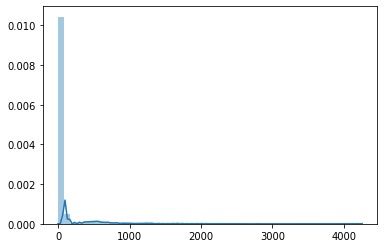

In [34]:
sns.distplot(x)
plt.show()

### Split Data
**Splitting data should be done after standardization on the job** which is the next step. Here, it is done before to see what happens when test data is not standardized for prediction.

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85, random_state=5)
x_train.shape, y_test.shape

((483, 30), (86,))

### Standardization - Preprocessing Step

In [8]:
from sklearn.preprocessing import StandardScaler

In [36]:
# Create scaler object
scaler = StandardScaler()

In [48]:
# Fit & transform "x_train" data - can be done at once by fit_transform()
scaler.fit(x_train)                            # Get mean & standard deviation of each column
x_train_t = scaler.transform(x_train)          # Perform standardization
x_train_t

array([[ 1.47622369, -0.13203122,  1.41763676, ...,  1.47582537,
         1.01857964, -0.05243044],
       [-1.69515898,  0.36557803, -1.61299365, ..., -0.53111345,
         0.67375681,  3.54873819],
       [-0.08191173,  1.07811709, -0.00641967, ...,  1.35569551,
         2.4540049 ,  1.35491021],
       ...,
       [ 1.10111701,  0.44033623,  1.3714829 , ...,  1.28022931,
         0.55026212,  1.96918204],
       [ 0.48651915,  0.88187682,  0.58686725, ...,  1.38803816,
         0.59677311,  2.26534882],
       [-1.21704224, -0.43573639, -1.2080984 , ..., -0.88395642,
         0.13968238, -0.55372014]])

### Logistic Regression
Target value is 'malignant' or benign'. It has **binary class** of the category.

In [50]:
# Create model object
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression(solver='newton-cg')

To see how the score changes, I will try several different cases with untransformed and transformed data. <br>
#### 1) Fit with untransformed train data & Predict untransfored train data

In [93]:
# Fit model 
logi.fit(x_train, y_train)
logi.classes_, logi.coef_, logi.intercept_

(array([0, 1]),
 array([[ 0.87760113,  0.19311463, -0.32945302,  0.0257606 , -0.16369568,
         -0.20656024, -0.49908735, -0.26724573, -0.25612174, -0.02831329,
         -0.04762646,  1.45630108,  0.10908966, -0.10390196, -0.02647736,
          0.05851127, -0.03716508, -0.03287373, -0.04078685,  0.01323775,
         -0.00178078, -0.45176192, -0.10898359, -0.0107303 , -0.34384812,
         -0.57879696, -1.2895823 , -0.52895258, -0.74231851, -0.09037023]]),
 array([33.09588923]))

In [94]:
# Predict data
pd.DataFrame(logi.predict(x_train), columns=['Category']).head()

,Category
0,0
1,1
2,0
3,0
4,0


In [95]:
# Compare with actual data
pd.DataFrame(y_train, columns=['Category']).head()

,Category
0,0
1,1
2,0
3,0
4,0


In [96]:
# Get score - Mean accuracy
logi.score(x_train, y_train)

0.9565217391304348

In [97]:
# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, r2_score

# 1. Classification report
cr = classification_report(y_train, logi.predict(x_train))
print('Report: ', cr)

# 2. Confusion_matrix
cm = confusion_matrix(y_train, logi.predict(x_train))
print('Matrix: ', cm)

# 3. R2
r2 = r2_score(y_train, logi.predict(x_train))
print('R-squared: ', r2)

Report:                precision    recall  f1-score   support

           0       0.95      0.93      0.94       179
           1       0.96      0.97      0.97       304

    accuracy                           0.96       483
   macro avg       0.95      0.95      0.95       483
weighted avg       0.96      0.96      0.96       483

Matrix:  [[167  12]
 [  9 295]]
R-squared:  0.813602616877389


#### 2) Fit with transformed train data & Predict transfored train data

In [98]:
# Fit model
logi.fit(x_train_t, y_train)

LogisticRegression(solver='newton-cg')

In [99]:
# Predict data
pd.DataFrame(logi.predict(x_train_t)).head()

,0
0,0
1,1
2,0
3,0
4,0


In [100]:
# Get score
logi.score(x_train_t, y_train)

0.9917184265010351

In [101]:
# Model Evaluation
# 1. Classification report
cr = classification_report(y_train, logi.predict(x_train_t))
print('Report: ', cr)

# 2. Confusion_matrix
cm = confusion_matrix(y_train, logi.predict(x_train_t))
print('Matrix: ', cm)

# 3. R2
r2 = r2_score(y_train, logi.predict(x_train_t))
print('R-squared: ', r2)

Report:                precision    recall  f1-score   support

           0       0.99      0.98      0.99       179
           1       0.99      1.00      0.99       304

    accuracy                           0.99       483
   macro avg       0.99      0.99      0.99       483
weighted avg       0.99      0.99      0.99       483

Matrix:  [[176   3]
 [  1 303]]
R-squared:  0.9644957365480741


> The outcome of 1) with untransfored data was big enough, but the score with transformed data got much better.

#### 3) Fit with transformed train data & Predict untransfored test data
This could happend often on the job.

In [102]:
# Fit model
logi.fit(x_train_t, y_train)

LogisticRegression(solver='newton-cg')

In [103]:
# Predict data
logi.predict(x_test)[:5]

array([0, 0, 0, 0, 0])

In [104]:
# Compare with actual data
y_test[:5]             # Big difference from prediction

array([0, 1, 1, 1, 1])

In [105]:
# Get score
logi.score(x_test, y_test)

0.38372093023255816

In [106]:
# Model Evaluation
# 1. Classification report
cr = classification_report(y_test, logi.predict(x_test))
print('Report: ', cr)

# 2. Confusion_matrix
cm = confusion_matrix(y_test, logi.predict(x_test))
print('Matrix: ', cm)

# 3. R2
r2 = r2_score(y_test, logi.predict(x_test))
print('R-squared: ', r2)

Report:                precision    recall  f1-score   support

           0       0.38      1.00      0.55        33
           1       0.00      0.00      0.00        53

    accuracy                           0.38        86
   macro avg       0.19      0.50      0.28        86
weighted avg       0.15      0.38      0.21        86

Matrix:  [[33  0]
 [53  0]]
R-squared:  -1.606060606060606


C:\Users\sori-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sori-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sori-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> R-squared is very low compared to the previous outcomes.

#### 4) Fit with transformed train data & Predict transfored test data

In [107]:
# Get transformed x_test data
scaler = StandardScaler()
x_test_t = scaler.fit_transform(x_test)
x_test_t

array([[ 2.58472063e-01,  1.19228003e+00,  3.38213328e-01, ...,
         1.16005338e+00,  1.92975390e+00,  8.57441644e-01],
       [-5.18210324e-01,  4.81017431e-01, -5.09856374e-01, ...,
        -5.79790727e-01, -1.06698772e+00,  3.89022798e-01],
       [ 4.85579046e-02, -2.16114822e+00,  3.28330187e-02, ...,
         2.53598088e-04, -9.01356108e-03, -2.45761431e-01],
       ...,
       [ 4.84129784e-01,  3.22440852e-01,  4.81125296e-01, ...,
         1.31687945e-01,  9.97850736e-01, -4.74071373e-01],
       [-1.58732327e-01,  1.56868247e-01, -1.20609304e-01, ...,
         4.84105313e-01,  5.14010702e-01,  1.82141695e+00],
       [-5.41825667e-01, -5.17082214e-01, -5.69277666e-01, ...,
        -5.77335360e-01,  3.72606748e-01, -1.71427962e-01]])

In [108]:
# Fit model
logi.fit(x_train_t, y_train)

LogisticRegression(solver='newton-cg')

In [109]:
# Predict data
logi.predict(x_test_t)[:5]        # Looks better than untransformated test data

array([0, 1, 1, 1, 1])

In [110]:
# Get score
logi.score(x_test_t, y_test)

0.9651162790697675

In [111]:
# Model Evaluation
# 1. Classification report
cr = classification_report(y_test, logi.predict(x_test_t))
print('Report: ', cr)

# 2. Confusion_matrix
cm = confusion_matrix(y_test, logi.predict(x_test_t))
print('Matrix: ', cm)

# 3. R2
r2 = r2_score(y_test, logi.predict(x_test_t))
print('R-squared: ', r2)

Report:                precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.95      1.00      0.97        53

    accuracy                           0.97        86
   macro avg       0.97      0.95      0.96        86
weighted avg       0.97      0.97      0.96        86

Matrix:  [[30  3]
 [ 0 53]]
R-squared:  0.8524871355060034


> R-squared got much better. Thus, **using transformated data for both fitting & prediction steps enables more accuarate prediction.**